In [1]:
import os
import sys
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import model_from_json
from keras.models import load_model
from keras.models import Model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("best_model.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [ ]:
from flask import Flask, render_template,request
app = Flask(__name__,template_folder='./templates2')
@app.route('/')
def home():
    return render_template('input.html')
@app.route('/',methods=['POST'])
def test_data():
    Test_texts=[]
    texts=[]
    fpath=request.form['fname']
    f = open(fpath, encoding='latin-1')
    t = f.read()
    texts.append(t)
    MAX_WORDS = 10000
    MAX_SEQUENCE_LENGTH = 1000
    tokenizer  = Tokenizer(num_words = MAX_WORDS)
    tokenizer.fit_on_texts(texts)
    sequences =  tokenizer.texts_to_sequences(texts)
    Test_word_index = tokenizer.word_index
    #print("unique words : {}".format(len(Test_word_index)))
    Test_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    #return Test_data
    test_lables_set={'alt.atheism': 0, 'comp.graphics': 1, 'comp.os.ms-windows.misc': 2, 'comp.sys.ibm.pc.hardware': 3, 'comp.sys.mac.hardware': 4, 'comp.windows.x': 5, 'misc.forsale': 6, 'rec.autos': 7, 'rec.motorcycles': 8, 'rec.sport.baseball': 9, 'rec.sport.hockey': 10, 'sci.crypt': 11, 'sci.electronics': 12, 'sci.med': 13, 'sci.space': 14, 'soc.religion.christian': 15, 'talk.politics.guns': 16, 'talk.politics.mideast': 17, 
     'talk.politics.misc': 18, 'talk.religion.misc': 19}
    labels1=list(test_lables_set.keys())
    Test_labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
    Test_labels = to_categorical(np.asarray(Test_labels))
    label=[]
    for x_t in Test_data:
        prediction = loaded_model.predict(np.array([x_t]))
        predicted_label = labels1[np.argmax(prediction[0])]
    #prediction = loaded_model.predict(np.array([Test_data]))
    #predicted_label=labels1[np.argmax(prediction[0])]
        label.append(predicted_label)
    return render_template('result.html',fp=str(predicted_label))
#print(label)
if __name__ == '__main__':
    app.run(threaded=False)   

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Apr/2020 17:51:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2020 17:54:08] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2020 17:55:06] "GET / HTTP/1.1" 200 -


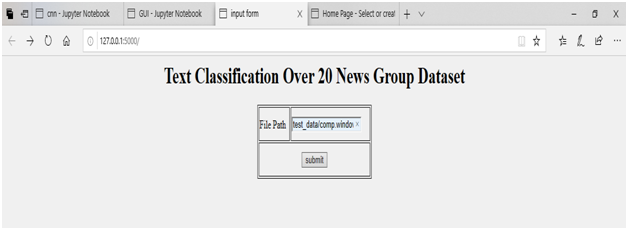

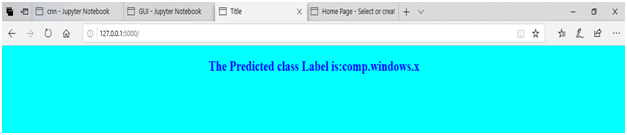